# 3 layer neural network for a non linear equation using tensorflow(without any higher-level Keras components like Layer or MeanSquaredError)

In [2]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=fbaaf122798b93cd00ff18d6cb793fa91076041c62b8e7c4edb449674c09b2a9
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=ebf4ccac3d9e4b0ec7a38eea59ba0575a4bebfad877c776c970fb4889c2e0924
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

In [43]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

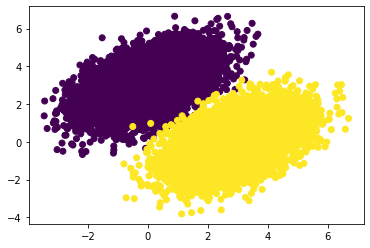

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [45]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.1055
Epoch 1: last batch loss = 0.0344
Epoch 2: last batch loss = 0.0289
Epoch 3: last batch loss = 0.0255
Epoch 4: last batch loss = 0.0241
Epoch 5: last batch loss = 0.0356
Epoch 6: last batch loss = 0.0449
Epoch 7: last batch loss = 0.0224
Epoch 8: last batch loss = 0.0278
Epoch 9: last batch loss = 0.0286


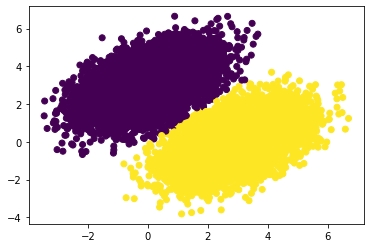

In [47]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

In [46]:
n = 100
d = 3
learning_rate = 0.01

x = tf.random.uniform(shape=(n, d), minval=-1, maxval=1, dtype=tf.float32)
weights_true = tf.constant([[6], [1], [1]], dtype=tf.float32)
#weights_true = tf.transpose(weights)

bias_true = tf.constant([1], dtype=tf.float32)

y_true = tf.einsum('ij,jk->i', x ** 3, weights_true) \
         + tf.einsum('ij,jk->i', x ** 2, weights_true) \
         + tf.einsum('ij,jk->i', x, weights_true) \
         + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
y_true

x: (100, 3), weights: (3, 1), bias: (1,), y: (100,)


<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 4.2953024 , -3.405776  ,  4.5922117 ,  1.2601504 ,  4.996585  ,
        4.040333  , 13.44746   , -0.5507517 ,  7.466744  , -2.1644824 ,
       -1.3616431 , -2.2015944 ,  0.9971874 , -5.9175367 ,  1.277826  ,
       -0.48152375, 23.378654  , 17.24852   , -1.2465377 , -2.6967435 ,
        0.05684149, 16.188457  , -0.64233005,  0.26414108, 17.408995  ,
        6.537675  ,  5.6256733 , -0.03118753,  3.7475739 , -1.3347573 ,
        1.8631811 , 15.94321   , 12.753216  ,  3.9184852 , -0.07469296,
       10.329925  ,  9.761175  , -0.9651098 ,  2.388804  , -0.8578849 ,
        3.5940287 ,  2.2852945 , 13.893765  ,  8.761523  , 12.572285  ,
       -0.16457236, -2.3035684 , 17.69887   ,  4.386235  ,  0.78528345,
        0.38429964, -1.5836296 ,  5.9303436 , -2.3499036 ,  3.3573563 ,
        9.131527  ,  0.81332934,  3.1992195 ,  0.47099113,  0.9925618 ,
        0.35027963,  7.657315  , -2.6112127 , -1.4144182 , -0.56893647,
       -3.20713 

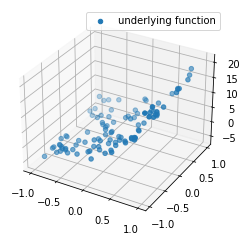

In [15]:
def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

In [18]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

#MSE

In [31]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return tf.reduce_mean(tf.square((y_pred - y_true)))

#Back Propagation

In [35]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return tf.reduce_mean(tf.square(y_pred - y_true))

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [36]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
